In [2]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import random
from faker import Faker
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Inisialisasi Faker
fake = Faker()

# Jumlah data yang akan dibuat
num_rows = 1000

# Pilihan kategori perintah
command_categories = ["Home Automation", "Productivity", "Security", "Entertainment", "Information"]
device_types = ["Smart Speaker", "Smartphone", "Smart TV", "Smart Hub", "Laptop"]
status_types = ["Success", "Error", "Pending"]
error_codes = {
    "ERR404": "Perangkat tidak ditemukan",
    "ERR501": "Koneksi terputus",
    "ERR403": "Akses ditolak",
    "ERR500": "Kesalahan sistem AI",
    None: "Tidak ada kesalahan (Success)"
}

# Variasi tambahan untuk perintah pengguna berdasarkan kategori
extended_command_categories = {
    "Home Automation": [
        "Nyalakan lampu ruang tamu",
        "Matikan semua lampu",
        "Atur suhu AC ke 24°C",
        "Buka tirai jendela",
        "Kunci pintu utama",
        "Aktifkan mode hemat energi",
        "Matikan televisi di kamar",
        "Atur pencahayaan ke mode malam",
        "Nyalakan kipas angin",
        "Aktifkan penyiram tanaman otomatis"
    ],
    "Productivity": [
        "Buat jadwal rapat dengan tim pukul 14:00",
        "Tambahkan catatan proyek: Perbaikan UI/UX",
        "Atur pengingat untuk membeli perlengkapan kantor",
        "Kirim email ke seluruh tim tentang update proyek",
        "Buat daftar tugas untuk minggu ini",
        "Simpan dokumen kerja terbaru",
        "Hitung waktu yang tersisa hingga tenggat proyek",
        "Bagikan agenda meeting dengan anggota tim",
        "Sinkronisasi kalender dengan jadwal tim",
        "Tampilkan laporan produktivitas minggu ini"
    ],
    "Security": [
        "Tampilkan rekaman CCTV dari jam 10 pagi",
        "Laporkan aktivitas mencurigakan di area belakang rumah",
        "Nonaktifkan alarm pintu garasi",
        "Kirim peringatan keamanan ke semua penghuni",
        "Aktifkan sensor gerak di halaman depan",
        "Verifikasi akses ke pintu utama dengan sidik jari",
        "Tampilkan daftar akses terakhir ke rumah",
        "Periksa status alarm keamanan",
        "Hubungi layanan keamanan darurat",
        "Matikan kamera keamanan di ruang tamu"
    ],
    "Entertainment": [
        "Putar playlist musik relaksasi",
        "Rekomendasikan film action terbaru",
        "Naikkan volume TV ke level 20",
        "Ganti channel ke berita internasional",
        "Aktifkan mode gaming",
        "Cari podcast tentang teknologi AI",
        "Putar episode terbaru dari serial favorit saya",
        "Baca sinopsis film yang sedang trending",
        "Tampilkan lirik lagu yang sedang diputar",
        "Aktifkan efek suara teater pada speaker"
    ],
    "Information": [
        "Tampilkan prakiraan cuaca hari ini",
        "Berikan informasi terbaru tentang teknologi AI",
        "Cek nilai tukar USD ke IDR",
        "Apa berita utama hari ini?",
        "Tampilkan jadwal penerbangan terbaru",
        "Berikan ringkasan artikel ilmiah terbaru",
        "Apa rekomendasi restoran di sekitar sini?",
        "Jelaskan konsep kecerdasan buatan secara singkat",
        "Cari informasi tentang kesehatan mental",
        "Hitung jarak dari lokasi saya ke bandara"
    ]
}

In [4]:
# Fungsi untuk membuat command_text dan AI response berdasarkan kategori
def generate_command_and_response(category):
    if category == "Home Automation":
        command = random.choice(extended_command_categories["Home Automation"])
        response = f"{command} berhasil dilakukan" if random.random() > 0.15 else "Perangkat tidak tersedia"
    elif category == "Productivity":
        command = random.choice(extended_command_categories["Productivity"])
        response = "Tugas telah disimpan" if random.random() > 0.1 else "Gagal menyimpan tugas"
    elif category == "Security":
        command = random.choice(extended_command_categories["Security"])
        response = "Keamanan telah diperbarui" if random.random() > 0.2 else "Rekaman tidak tersedia"
    elif category == "Entertainment":
        command = random.choice(extended_command_categories["Entertainment"])
        response = "Media sedang diputar" if random.random() > 0.1 else "Konten tidak ditemukan"
    else:
        command = random.choice(extended_command_categories["Information"])
        response = "Berikut adalah informasi yang saya temukan" if random.random() > 0.1 else "Maaf, saya tidak dapat menemukan informasi itu"
    
    return command, response

In [5]:
# Membuat data palsu
data = []
for i in range(1, num_rows + 1):
    user_id = random.randint(100, 500)
    timestamp = fake.date_time_between(start_date="-1y", end_date="now")
    device_type = random.choice(device_types)
    command_category = random.choice(command_categories)
    command_text, ai_response = generate_command_and_response(command_category)
    
    response_time_ms = random.randint(200, 1000)
    ai_confidence_score = round(random.uniform(60.0, 99.9), 2)
    user_satisfaction = random.randint(2, 5)

    # Menentukan status dengan kemungkinan realistis
    if random.random() > 0.95:  # 15% kemungkinan terjadi error
        status = "Error"
        error_code = random.choice(list(error_codes.keys())[:-1])  # Pilih error kecuali None
        ai_response = error_codes[error_code]  # Gunakan pesan error yang sesuai
    else:
        status = "Success"
        error_code = None

    data.append([i, user_id, timestamp, device_type, command_category, command_text, ai_response,
                 response_time_ms, ai_confidence_score, user_satisfaction, status, error_code])


In [6]:
# Membuat DataFrame
df = pd.DataFrame(data, columns=[
    "interaction_id", "user_id", "timestamp", "device_type", "command_category", "command_text", "ai_response",
    "response_time_ms", "ai_confidence_score", "user_satisfaction", "status", "error_code"
])

df.head(10)

,interaction_id,user_id,timestamp,device_type,command_category,command_text,ai_response,response_time_ms,ai_confidence_score,user_satisfaction,status,error_code
0,1,447,2024-03-12 17:56:48,Smart Speaker,Information,Apa rekomendasi restoran di sekitar sini?,Akses ditolak,310,67.97,4,Error,ERR403
1,2,469,2024-12-01 06:40:13,Smartphone,Productivity,Bagikan agenda meeting dengan anggota tim,Tugas telah disimpan,315,70.04,5,Success,None
2,3,113,2024-09-08 02:02:41,Smart TV,Home Automation,Atur suhu AC ke 24°C,Atur suhu AC ke 24°C berhasil dilakukan,602,87.21,3,Success,None
3,4,238,2024-10-26 06:44:04,Smartphone,Entertainment,Cari podcast tentang teknologi AI,Media sedang diputar,294,90.50,5,Success,None
4,5,484,2024-08-16 23:26:00,Smart Speaker,Productivity,Tampilkan laporan produktivitas minggu ini,Tugas telah disimpan,203,83.39,4,Success,None
5,6,440,2024-11-19 17:03:13,Laptop,Home Automation,Matikan televisi di kamar,Perangkat tidak tersedia,645,75.04,5,Success,None
6,7,438,2024-09-19 03:31:27,Smart TV,Home Automation,Atur suhu AC ke 24°C,Atur suhu AC ke 24°C berhasil dilakukan,542,78.71,4,Success,None
7,8,155,2024-06-09 09:41:45,Smart Speaker,Home Automation,Nyalakan kipas angin,Nyalakan kipas angin berhasil dilakukan,780,80.17,5,Success,None
8,9,405,2024-05-07 15:41:34,Smart TV,Security,Verifikasi akses ke pintu utama dengan sidik jari,Keamanan telah diperbarui,319,74.76,4,Success,None
9,10,443,2024-05-15 00:00:27,Smart TV,Entertainment,Baca sinopsis film yang sedang trending,Media sedang diputar,996,97.78,5,Success,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   interaction_id       1000 non-null   int64         
 1   user_id              1000 non-null   int64         
 2   timestamp            1000 non-null   datetime64[ns]
 3   device_type          1000 non-null   object        
 4   command_category     1000 non-null   object        
 5   command_text         1000 non-null   object        
 6   ai_response          1000 non-null   object        
 7   response_time_ms     1000 non-null   int64         
 8   ai_confidence_score  1000 non-null   float64       
 9   user_satisfaction    1000 non-null   int64         
 10  status               1000 non-null   object        
 11  error_code           46 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 93.9+ KB


In [8]:
# count unique values in each column
df.nunique()

interaction_id         1000
user_id                 360
timestamp               999
device_type               5
command_category          5
command_text             50
ai_response              23
response_time_ms        568
ai_confidence_score     865
user_satisfaction         4
status                    2
error_code                4
dtype: int64

In [9]:
# take status data error
df_error = df[df["status"] == "Error"]
df_error.head()

,interaction_id,user_id,timestamp,device_type,command_category,command_text,ai_response,response_time_ms,ai_confidence_score,user_satisfaction,status,error_code
0,1,447,2024-03-12 17:56:48,Smart Speaker,Information,Apa rekomendasi restoran di sekitar sini?,Akses ditolak,310,67.97,4,Error,ERR403
43,44,334,2025-01-16 21:11:21,Smart Hub,Home Automation,Aktifkan mode hemat energi,Kesalahan sistem AI,524,75.86,3,Error,ERR500
55,56,363,2024-09-07 10:40:13,Smart Hub,Entertainment,Baca sinopsis film yang sedang trending,Perangkat tidak ditemukan,332,60.51,4,Error,ERR404
82,83,493,2025-01-21 17:38:54,Smartphone,Entertainment,Ganti channel ke berita internasional,Akses ditolak,864,62.80,2,Error,ERR403
134,135,181,2024-04-20 16:17:59,Smart TV,Productivity,Tambahkan catatan proyek: Perbaikan UI/UX,Akses ditolak,202,74.79,3,Error,ERR403


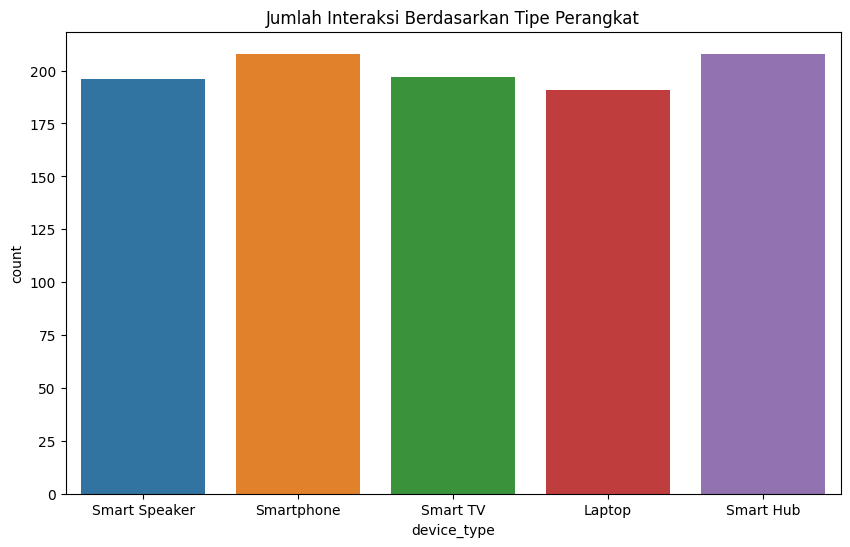

In [10]:
# visualisasi data device_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='device_type')
plt.title('Jumlah Interaksi Berdasarkan Tipe Perangkat')
plt.show()

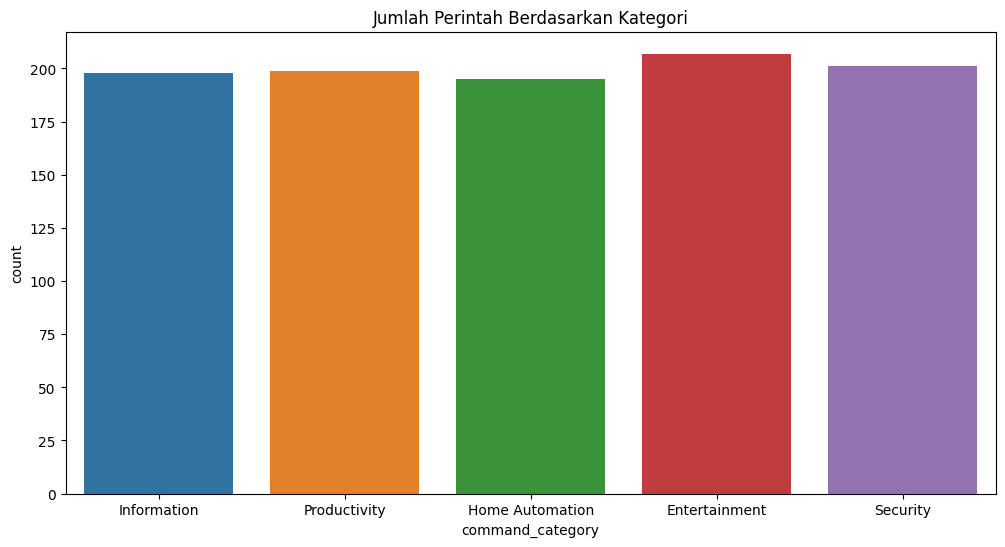

In [11]:
# visualisasi data command_category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='command_category')
plt.title('Jumlah Perintah Berdasarkan Kategori')
plt.show()

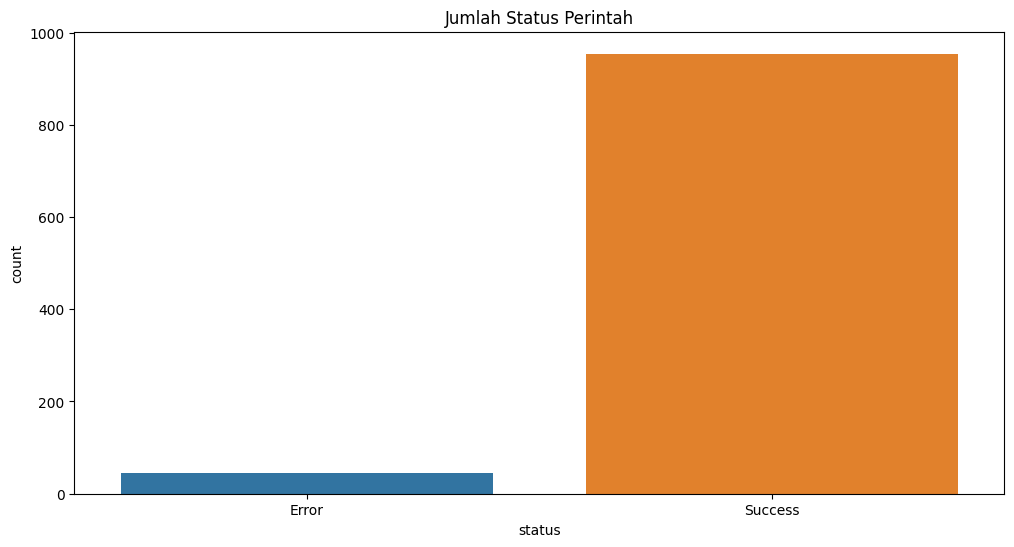

In [12]:
# visualisasi data status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='status')
plt.title('Jumlah Status Perintah')
plt.show()

In [ ]:
# save data to csv
df.to_csv("../files/synthetic_data.csv", index=False)